In [1]:
from urllib.request import urlopen
from PIL import Image # package pillow
import math

In [2]:


def criarImagemRGB():
    img = Image.new( "RGB", (512,256))
    raster = img.load()

    for i in range(img.size[0]):
        for j in range(img.size[1]):
            raster[i,j] = (220,219,97,255)

    # obtendo o pixel 0,0
    (r, g, b) = img.getpixel((0, 0))
    print("Pixel (0,0) com getpixel:", r, g, b)

    # outra forma
    print("Pixel (0,0): com raster", raster[0, 0])

    return img

def criarImagemCinza():
    img = Image.new( "L", (256,256))
    raster = img.load()
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            raster[i,j] = i
    y = img.getpixel((5, 5))
    print(y)
    return img

def criarImagemBinaria():
    # checkerboard pattern.
    img = Image.new("1", (500,500))
    raster = img.load()
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            if ((int(i/50)+int(j/50)) % 2 == 0):
                raster[i,j] = 0
            else:
                raster[i,j] = 1
    y = img.getpixel((0, 0))
    print(y)
    return img

In [5]:
img = Image.open(urlopen("https://www.inf.ufsc.br/~roberto.willrich/INE5431/RGB.png"))
print("Largura:", img.width, "Altura:", img.height)
img.show()
criarImagemRGB().show()
criarImagemCinza().show()
criarImagemBinaria().show()

Largura: 1024 Altura: 1024
Pixel (0,0) com getpixel: 220 219 97
Pixel (0,0): com raster (220, 219, 97)
5
0


Imagem Original:


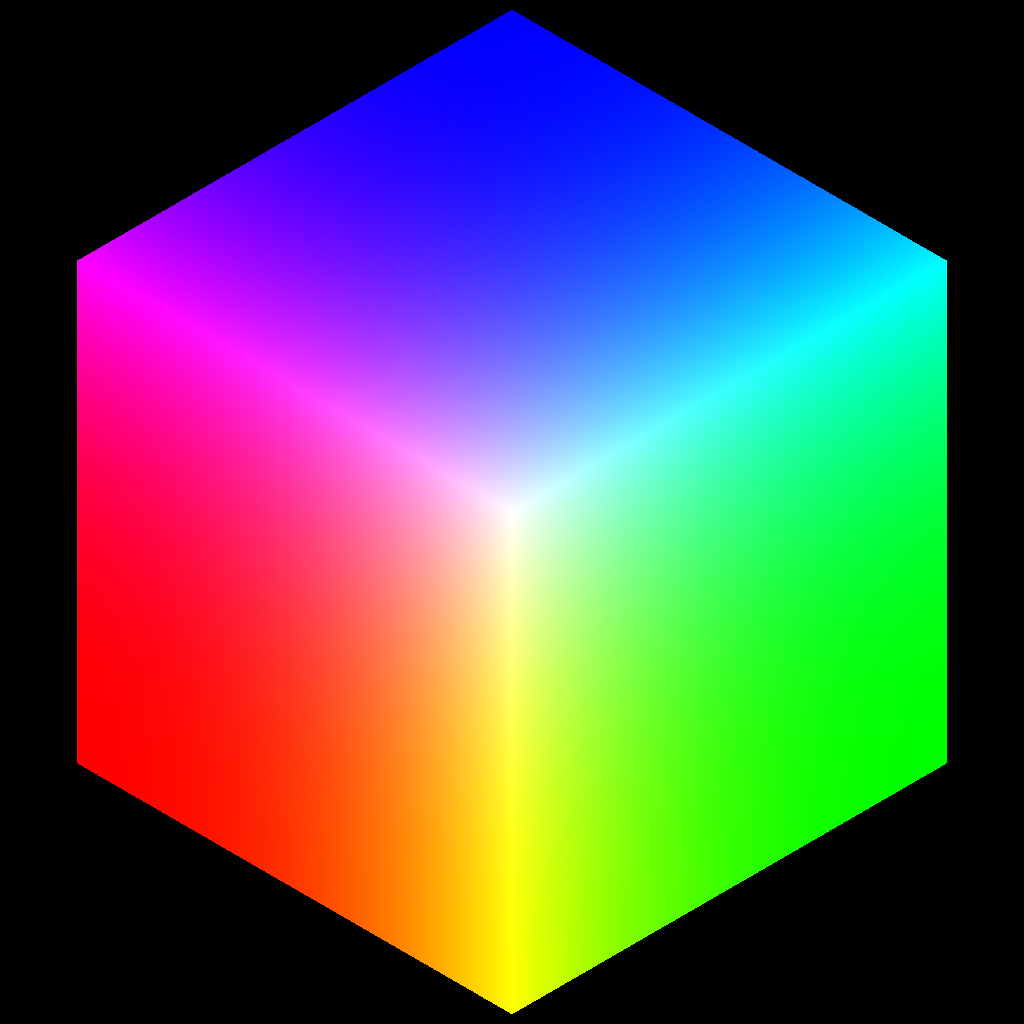


Imagem com resolução reduzida:


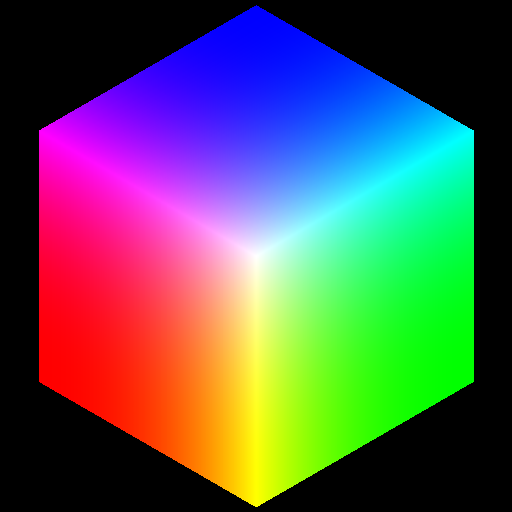


Imagem em tons de cinza:


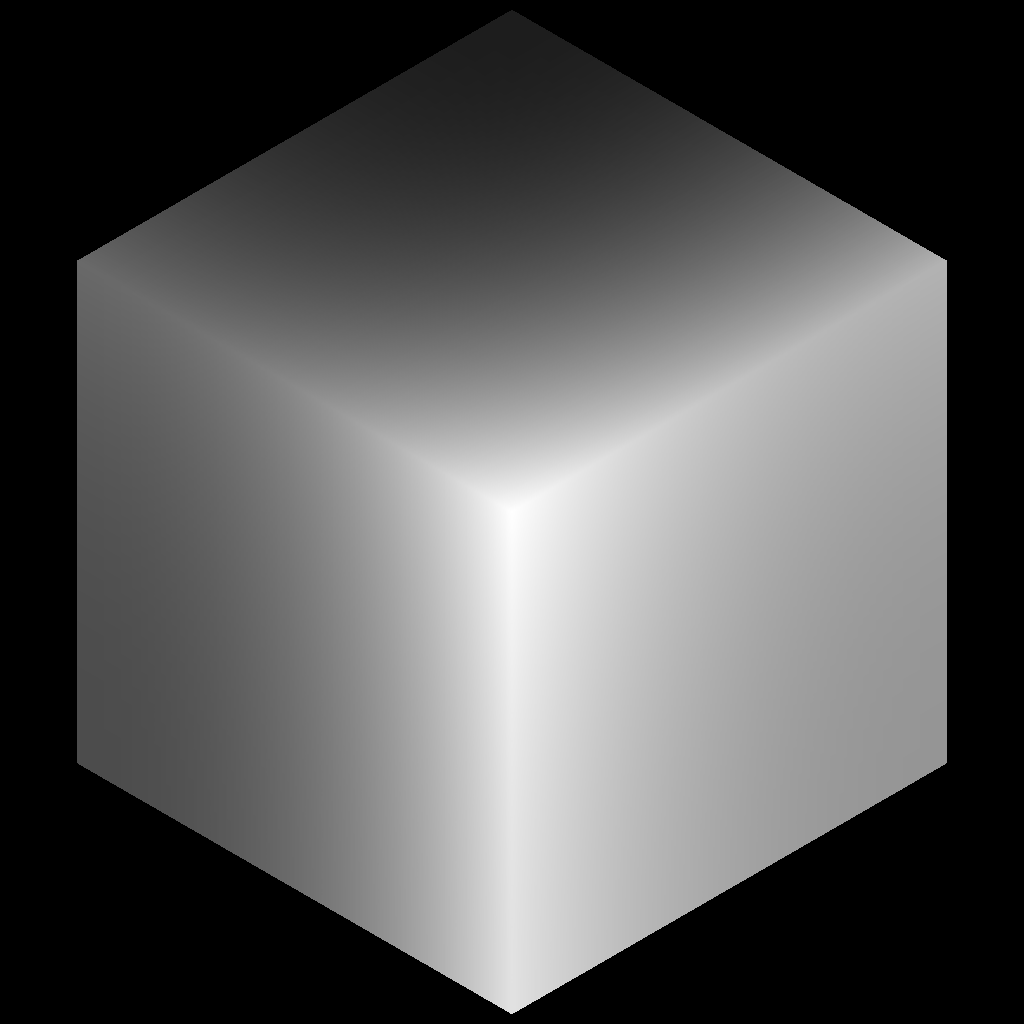


Imagem binária:


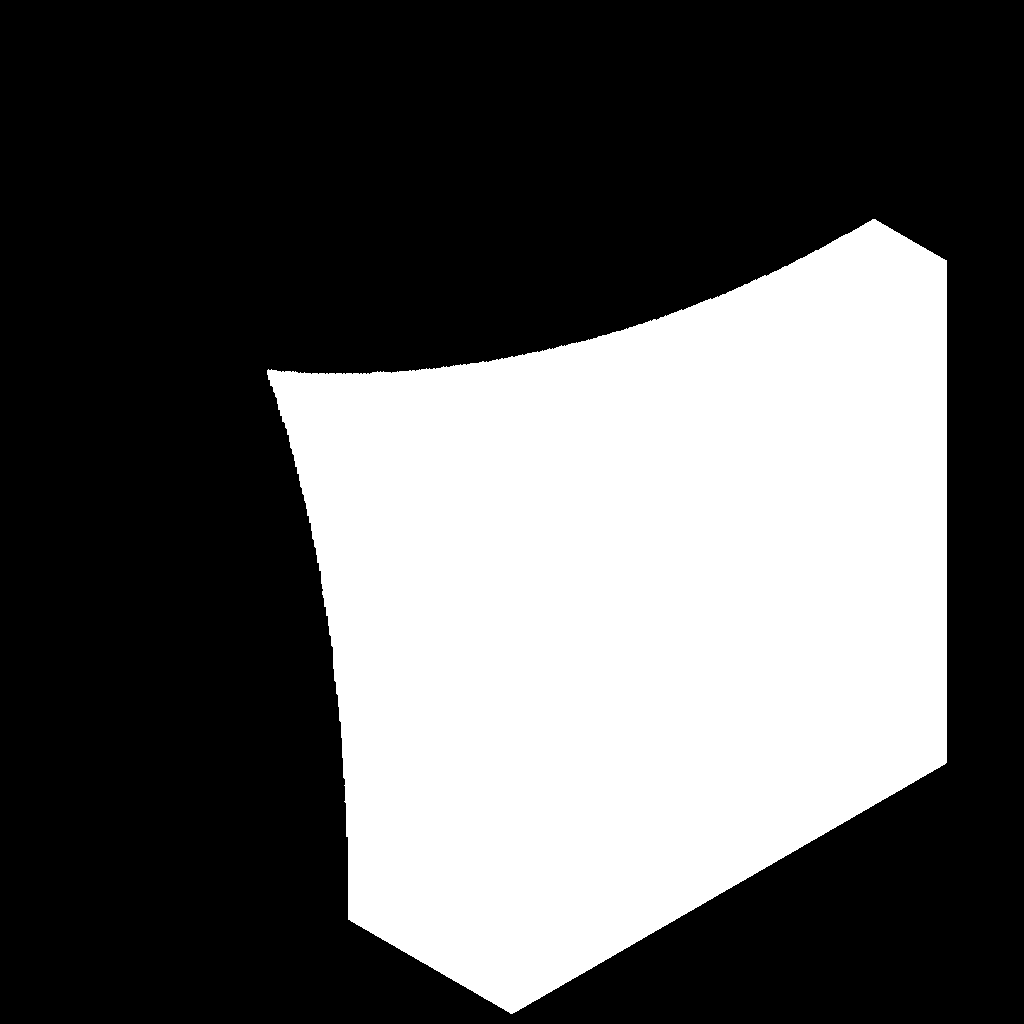


Imagem com bits reduzidos:


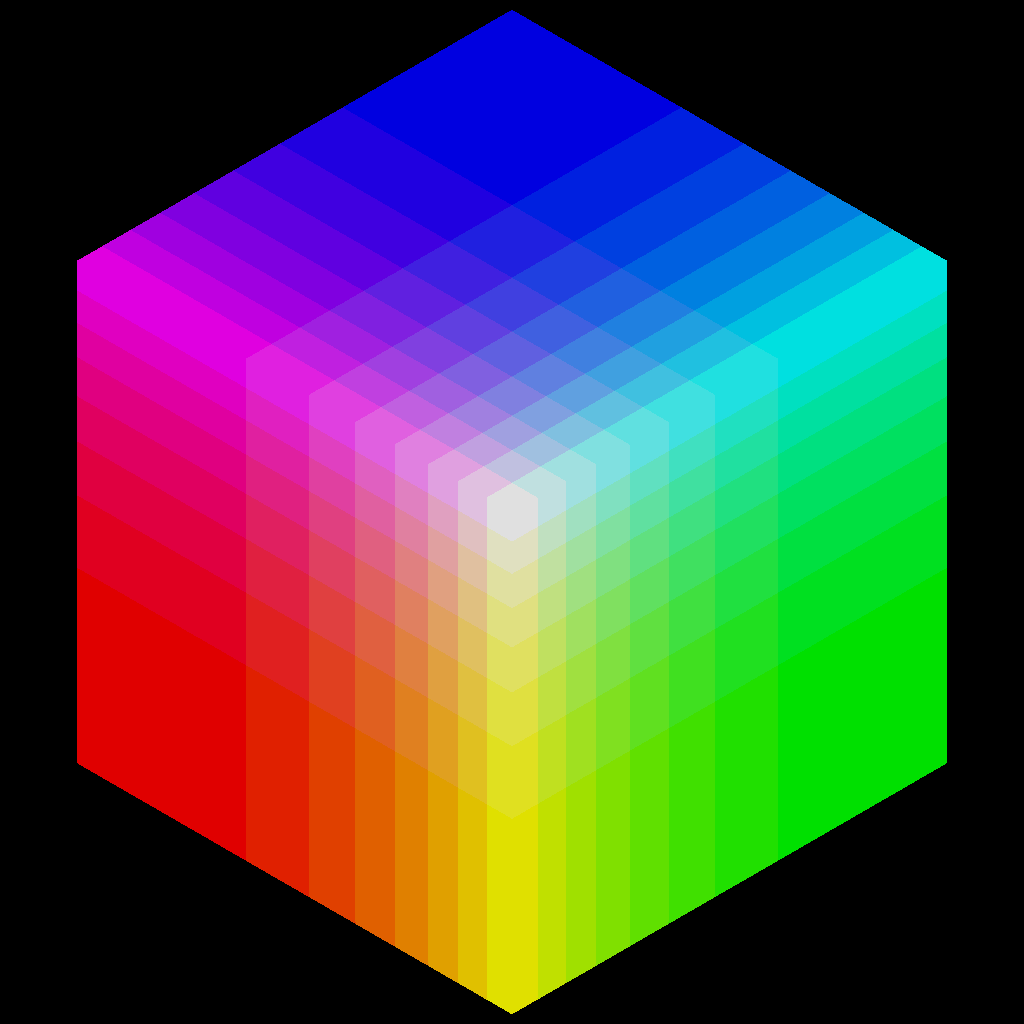


Canais RGB separados:
Canal Vermelho (R):


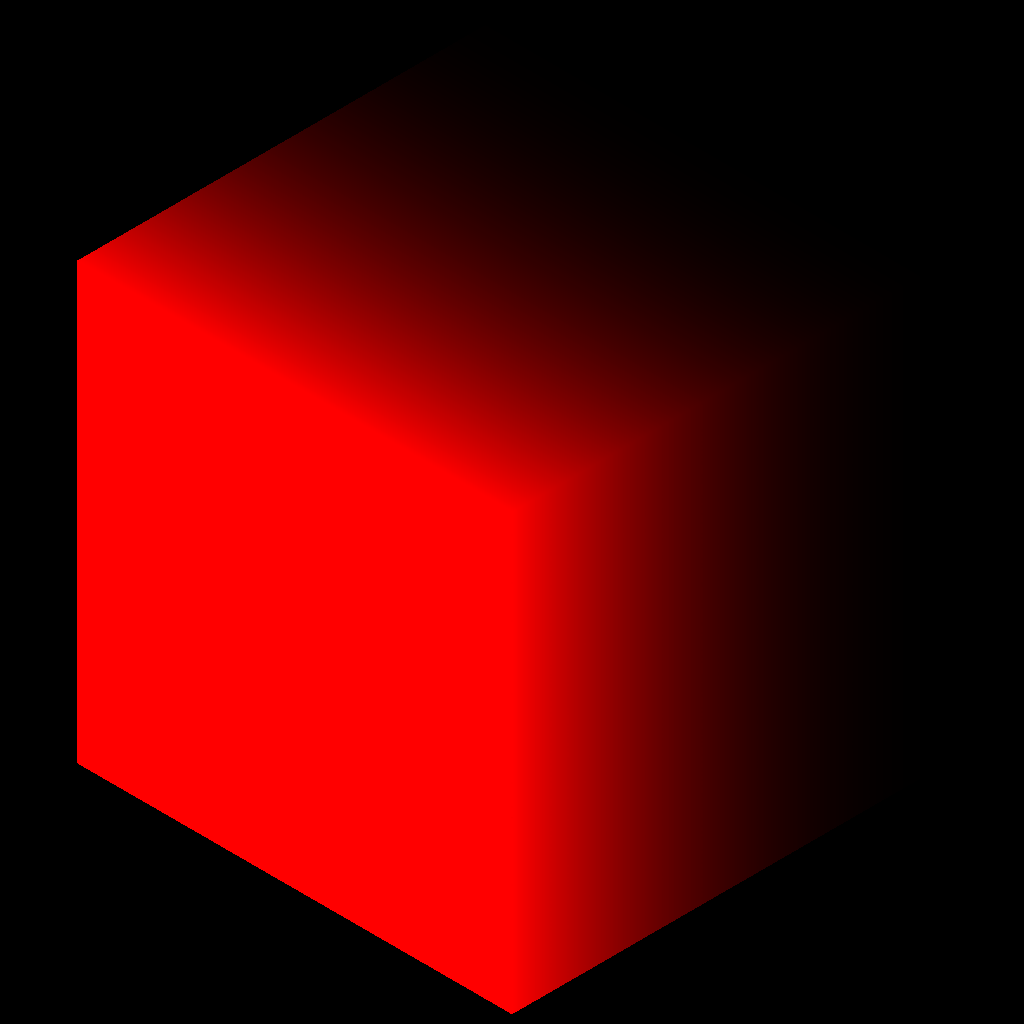

Canal Verde (G):


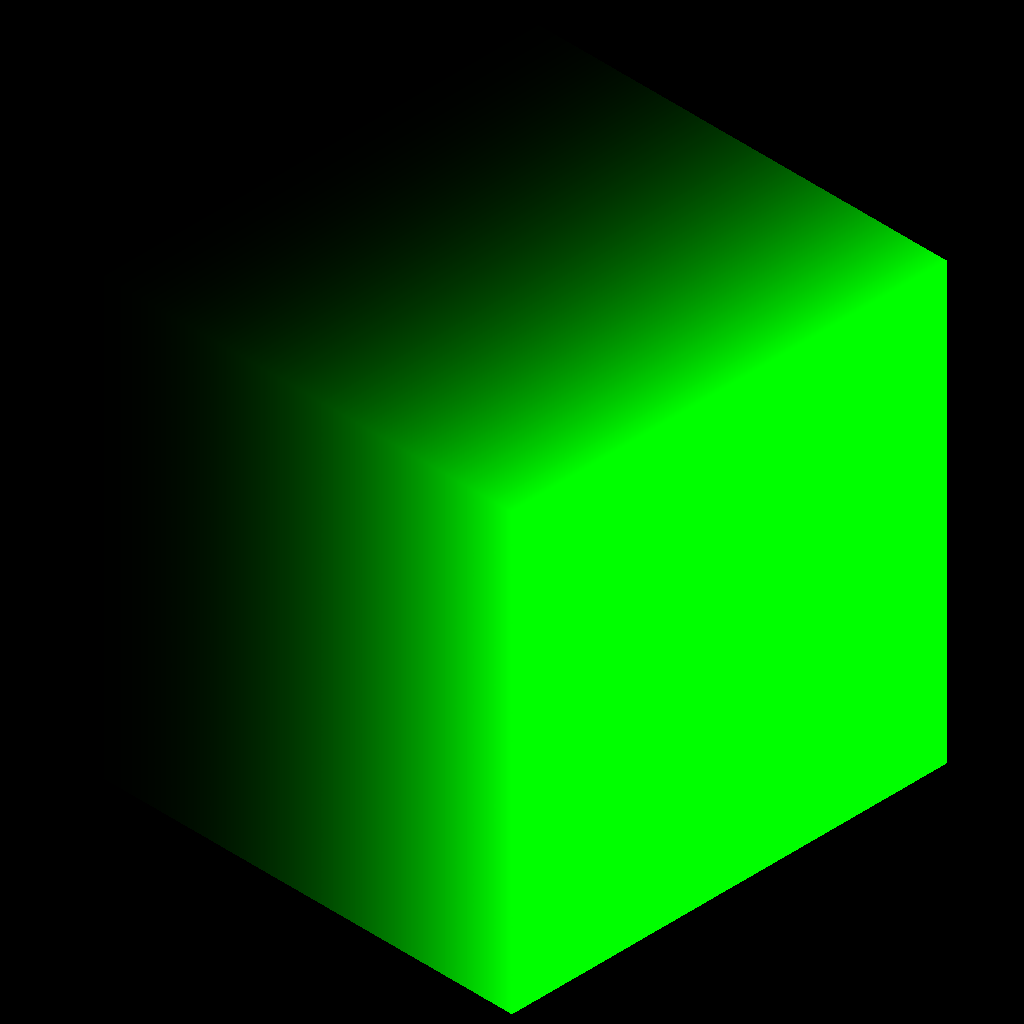

Canal Azul (B):


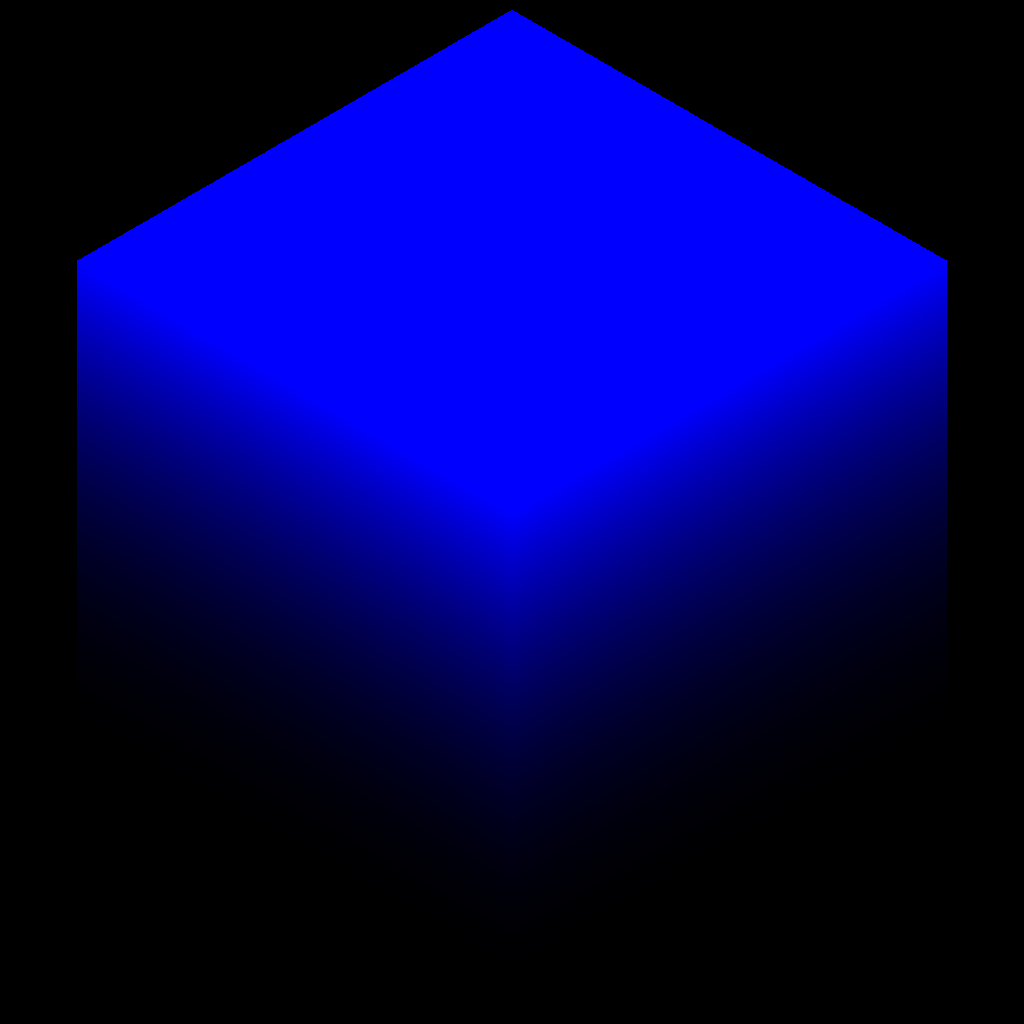

In [4]:
def reduzir_resolucao(img):
    """Reduz a resolução da imagem pela metade (altura e largura)."""
    largura_original, altura_original = img.size
    nova_largura = largura_original // 2
    nova_altura = altura_original // 2
    img_reduzida = Image.new(img.mode, (nova_largura, nova_altura))
    raster_original = img.load()
    raster_reduzida = img_reduzida.load()

    for i in range(nova_largura):
        for j in range(nova_altura):
            # Pega o pixel da imagem original correspondente ao novo pixel
            pixel_original = raster_original[i * 2, j * 2]
            raster_reduzida[i, j] = pixel_original
    return img_reduzida

def transformar_cinza(img):
    """Transforma a imagem RGB em tons de cinza."""
    largura, altura = img.size
    img_cinza = Image.new("L", (largura, altura))
    raster_original = img.load()
    raster_cinza = img_cinza.load()

    for i in range(largura):
        for j in range(altura):
            r, g, b = raster_original[i, j]
            # Fórmula comum para converter RGB para tons de cinza
            tom_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            raster_cinza[i, j] = tom_cinza
    return img_cinza

def transformar_binaria(img, threshold=128):
    """Transforma a imagem RGB em imagem binária."""
    largura, altura = img.size
    img_binaria = Image.new("1", (largura, altura))
    raster_binaria = img_binaria.load()

    # Converte a imagem de entrada (deve ser RGB) para tons de cinza DENTRO desta função
    img_cinza = transformar_cinza(img)
    raster_cinza = img_cinza.load()

    for i in range(largura):
        for j in range(altura):
            if raster_cinza[i, j] > threshold:
                raster_binaria[i, j] = 1 # Branco
            else:
                raster_binaria[i, j] = 0 # Preto
    return img_binaria

def reduzir_bits(img):
    """Reduz o número de bits por pixel para 3 bits."""
    largura, altura = img.size
    img_reduzida_bits = Image.new(img.mode, (largura, altura))
    raster_original = img.load()
    raster_reduzida = img_reduzida_bits.load()

    # Máscara para manter apenas os 3 bits mais significativos (1110 0000)
    mascara = 0b11100000 # 224 em decimal

    for i in range(largura):
        for j in range(altura):
            r, g, b = raster_original[i, j]
            # Aplica a máscara usando operação AND bit a bit
            r_reduzido = r & mascara
            g_reduzido = g & mascara
            b_reduzido = b & mascara
            raster_reduzida[i, j] = (r_reduzido, g_reduzido, b_reduzido)
    return img_reduzida_bits


def separar_canais(img):
    """Realiza a separação dos canais RGB da imagem."""
    largura, altura = img.size
    img_r = Image.new("RGB", (largura, altura))
    img_g = Image.new("RGB", (largura, altura))
    img_b = Image.new("RGB", (largura, altura))

    raster_original = img.load()
    raster_r = img_r.load()
    raster_g = img_g.load()
    raster_b = img_b.load()

    for i in range(largura):
        for j in range(altura):
            r, g, b = raster_original[i, j]
            raster_r[i, j] = (r, 0, 0)
            raster_g[i, j] = (0, g, 0)
            raster_b[i, j] = (0, 0, b)

    return img_r, img_g, img_b

# Carrega a imagem original e converte para RGB
img = Image.open(urlopen("https://www.inf.ufsc.br/~roberto.willrich/INE5431/RGB.png")).convert("RGB")

# Chama as funções e exibe as imagens
print("Imagem Original:")
display(img)

print("\nImagem com resolução reduzida:")
img_reduzida = reduzir_resolucao(img)
display(img_reduzida)

print("\nImagem em tons de cinza:")
img_cinza = transformar_cinza(img)
display(img_cinza)

print("\nImagem binária:")
# Passa a imagem original (RGB) para a função transformar_binaria
img_binaria = transformar_binaria(img)
display(img_binaria)

print("\nImagem com bits reduzidos:")
img_reduzida_bits = reduzir_bits(img)
display(img_reduzida_bits)

print("\nCanais RGB separados:")
img_r, img_g, img_b = separar_canais(img)
print("Canal Vermelho (R):")
display(img_r)
print("Canal Verde (G):")
display(img_g)
print("Canal Azul (B):")
display(img_b)